<h1 style="font-size: 36px;">Analysis of Crimes Against Women in India (2001-2021)</h1>

# 1. Introduction
India, a land rich in culture, heritage, and diversity, has unfortunately witnessed a troubling rise in crimes against women, especially over the past two decades. This analysis is inspired by the deep concern over the increasing number of reported cases, particularly the Kolkata rape case, which has deeply moved me.

# 2. Statistical Overview of Dataset
The dataset encompasses crime statistics from 2001 to 2021, covering various categories of crimes against women, including Rape, Kidnap and Assault (K&A), Dowry Deaths (DD), Assault on Women (AoW), Assault on Modesty (AoM), Domestic Violence (DV), and Women Trafficking (WT).

# 3. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Output
from math import pi
import warnings
warnings.filterwarnings('ignore')

In [2]:
description = pd.read_csv("/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv")

In [3]:
description.head(10)

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths
5,5,AoW,Assault against women
6,6,AoM,Assault against modesty of women
7,7,DV,Domestic violence
8,8,WT,Women Trafficking


Note: for sake of the visualization purposes, I've carried forward with the **abbreviations** of the Crimes.

In [4]:
data = pd.read_csv("/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv")

In [5]:
data.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [6]:
data.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


The Dataset does not contain any null values.

In [8]:
print("Total number of entries : ", len(data))
print("Total number of States : ", data['State'].nunique())
print("Years covered : ", data['Year'].min(), "-", data['Year'].max())
print("Missing values in each column :")
print(data.isnull().sum())

Total number of entries :  736
Total number of States :  70
Years covered :  2001 - 2021
Missing values in each column :
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


# 4. Visual Analysis
## 4.1 Timeline of Kolkata Rape Case

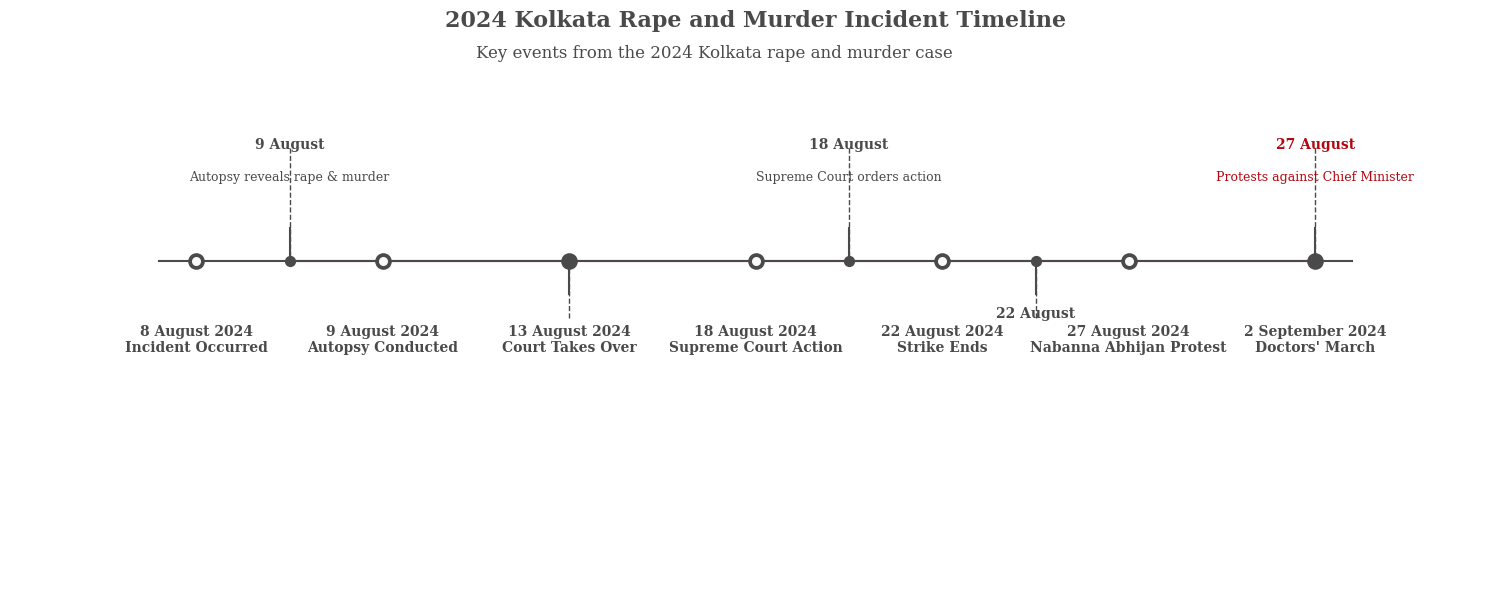

In [9]:
tl_dates = [
    "8 August 2024\nIncident Occurred",
    "9 August 2024\nAutopsy Conducted",
    "13 August 2024\nCourt Takes Over",
    "18 August 2024\nSupreme Court Action",
    "22 August 2024\nStrike Ends",
    "27 August 2024\nNabanna Abhijan Protest",
    "2 September 2024\nDoctors' March"
]

tl_x = [1, 2, 3, 4, 5, 6, 7]

tl_sub_x = [1.5, 3, 4.5, 5.5, 7]

tl_sub_times = [
    "9 August","","18 August","22 August","27 August"
]

tl_text = [
    "Autopsy reveals rape & murder",
    "",
    "Supreme Court orders action",
    "",
    "Protests against Chief Minister"
]

fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
ax.set_ylim(-3, 2)
ax.set_xlim(0, 8)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)

for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.8, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=10)

levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    y_offset = 1.5 * (idx % 2) - 0.5
    ax.text(x, y_offset, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx != len(tl_sub_x) else '#b20710', fontsize=10)
    
    text = ax.text(x, y_offset - 0.2, txt, va='top', ha='center', 
        fontfamily='serif', color='#4a4a4a' if idx != len(tl_sub_x) else '#b20710', fontsize=9)
    
    # Draw line connecting text to the stem
    ax.plot([x, x], [y_offset, 0], c='#4a4a4a', linestyle='--', linewidth=1)

for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([]) 

ax.set_title("2024 Kolkata Rape and Murder Incident Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.5, 1.8, "Key events from the 2024 Kolkata rape and murder case", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

## 4.2 Trend of Different Crimes Against Women in India

In [10]:
yearly_data = data.groupby('Year').sum().reset_index()

fig = go.Figure()


fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Rape'],
                         mode='lines', 
                         name='Rape',
                         line=dict(color='red', width=3)))

for crime in ['K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']:
    fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data[crime],
                             mode='lines', 
                             name=crime))

fig.update_layout(title="Trend of Different Crimes Against Women (2001-2021)",
                  xaxis_title='Year',
                  yaxis_title='Number of Cases',
                  template='plotly_white')

fig.show()

we can see that (acc. to the data), the **Highest (Reported) Crime is Domestic Violence (DV)**. 

## 4.3 Total No. of Rape Cases (2001-2021)

In [11]:
yearlyRapeData = data.groupby('Year')['Rape'].sum().reset_index()

maxYear = yearlyRapeData.loc[yearlyRapeData["Rape"].idxmax()]

fig = go.Figure()

fig.add_trace(go.Bar(x=yearlyRapeData['Year'],
                    y=yearlyRapeData['Rape'],
                    marker_color='darkred',
                    name="Total Rape Cases"))

fig.add_trace(go.Scatter(x=yearlyRapeData["Year"],
                        y=yearlyRapeData["Rape"],
                        mode="lines",
                        line=dict(color="black", width=2),
                        name="Trend Line"))

fig.add_trace(go.Scatter(x=[maxYear['Year']],
                        y=[maxYear["Rape"]],
                        mode="markers+text",
                        marker=dict(color='blue',
                                   size=12,
                                   symbol='circle'),
                        text=[f'Max : {maxYear["Rape"]}'],
                        textposition='top center',
                        name="Maximum Cases"))

fig.update_layout(title="Total Rape Cases Every Year (2001-2021)",
                  xaxis_title="Year",
                  yaxis_title="No. of Cases",
                  template="plotly_white")

fig.show() 

'''


fig = px.bar(yearlyRapeData,
            x="Year",
            y="Rape",
            title="Total Rape Cases Every Year (2001-2021)",
            labels={"Rape":"Number of Rape Cases"},
            color_discrete_sequence=['red'])

fig.update_traces(marker_line_width=1.5)
fig.update_layout(xaxis_title="Year",
                 yaxis_title="Total Rape Cases")

fig.show()
'''

'\n\n\nfig = px.bar(yearlyRapeData,\n            x="Year",\n            y="Rape",\n            title="Total Rape Cases Every Year (2001-2021)",\n            labels={"Rape":"Number of Rape Cases"},\n            color_discrete_sequence=[\'red\'])\n\nfig.update_traces(marker_line_width=1.5)\nfig.update_layout(xaxis_title="Year",\n                 yaxis_title="Total Rape Cases")\n\nfig.show()\n'

## 4.4 State-wise Distribution of Crime Against Women

In [12]:
state_data = data.groupby("State").sum().reset_index()

color_map = {
    "Rape": "red",
    "K&A": "blue",
    "DD": "green",
    "AoW": "orange",
    "AoM": "purple",
    "DV": "brown",
    "WT": "pink"
}

fig = px.bar(state_data,
             x="State",
             y=["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"],
             title="State-Wise Total Crimes Against Women (2001-2021)",
             barmode="stack",
             color_discrete_map=color_map)

fig.show()

We can infer that "Uttar Pradesh" has highest number of recorded cases whereas North-Eastern States like Meghalya, Mizoram and Tripura have relatively lesser number of recorded cases of crimes against women; Which can be further accounted to the **respective state's population, socio-political factors, legal aid and presence** etc.

Note: You can double-tap on any of the variable to update and display information about specific crime in a particular state.

## 4.5 Top 5 States with Highest Number of Crimes Against Women

In [13]:
state_data['Total_Crimes'] = state_data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

top5_states = state_data.nlargest(5, 'Total_Crimes')['State']

top5_state_data = state_data[state_data['State'].isin(top5_states)]

color_map = {
    "Rape": "red",
    "K&A": "blue",
    "DD": "green",
    "AoW": "orange",
    "AoM": "purple",
    "DV": "brown",
    "WT": "pink"
}

fig = px.bar(top5_state_data,
             x="State",
             y=["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"],
             title="Top 5 States with Highest Total Crimes Against Women (2001-2021)",
             barmode="stack",
             color_discrete_map=color_map)

fig.show()

## 4.6 Co-Relation of Different Crimes against Women

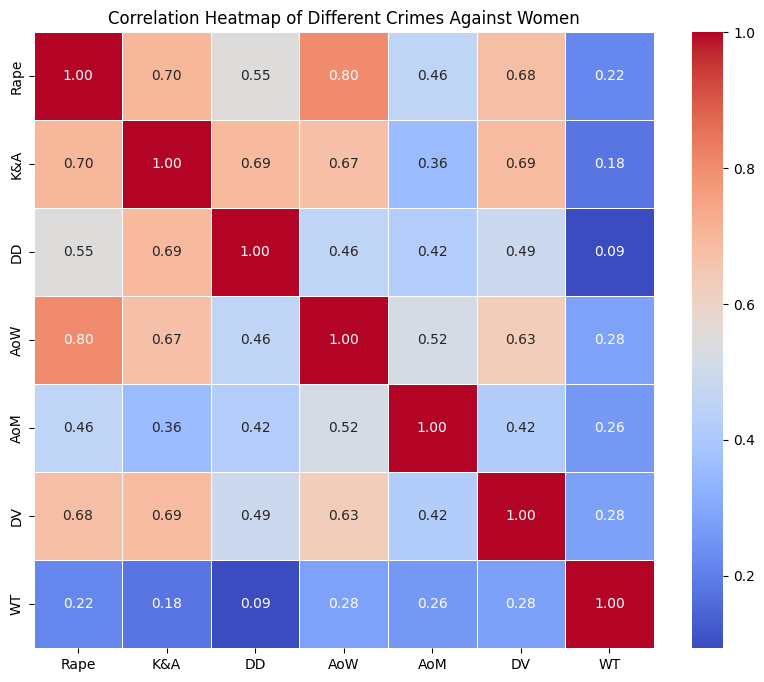

In [14]:
correlation_matrix = data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Different Crimes Against Women')
plt.show()

Note: It may not be evident by the correlation matrix alone but it is often found that Different crimes against women are related to each other, especially in India. Women, Girls, Infants and even People from old age homes were reported to be kidnapped and then assaulted and/or tortured and/or raped and/or murdered. As if that wasn't enough, there have been cases where the victims are left at errie spots to succumb to their injury and die. 

In [15]:
data.State = list(map(str.title, data.State))

## 4.7 Year/State-wise Trend of Crime (Dropdown)

In [16]:
options = list(data.State.unique())

dropdown = widgets.Dropdown(
    options=options,
    value=options[0],
    description="Select State"
)

plot_out = Output()

def on_change(change):
    with plot_out:
        plot_out.clear_output()  # Clear previous output
        state = change["new"]
        filtered_data = data[data['State'] == state]
        fig = px.line(data_frame=filtered_data, 
                      x="Year", 
                      y=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
                      title=f"Year-Wise Trend of Crimes in {state}",
                      markers=True)
        fig.update_layout(
            legend={
                "orientation": "h",
                "yanchor": "bottom",
                "entrywidth": 70,
                "y": 1.02,
                "xanchor": "right",
                "x": 1
            },
            title={
                'x': 0.5,
                'xanchor': 'center'
            },
            width=1080,  
            height=520  
        )
        fig.show()

dropdown.observe(on_change, names='value')

display(dropdown, plot_out)

with plot_out:
    on_change({'new': dropdown.value})

**Note: you can select any state from the Dropdown**

In [19]:
crimeYear = data.groupby("Year").sum()

In [20]:
print(crimeYear[:0])

Empty DataFrame
Columns: [Unnamed: 0, State, Rape, K&A, DD, AoW, AoM, DV, WT]
Index: []


## 4.8 Pattern of Crimes (Rape/Domestic Violence/AoW) 2001-2021

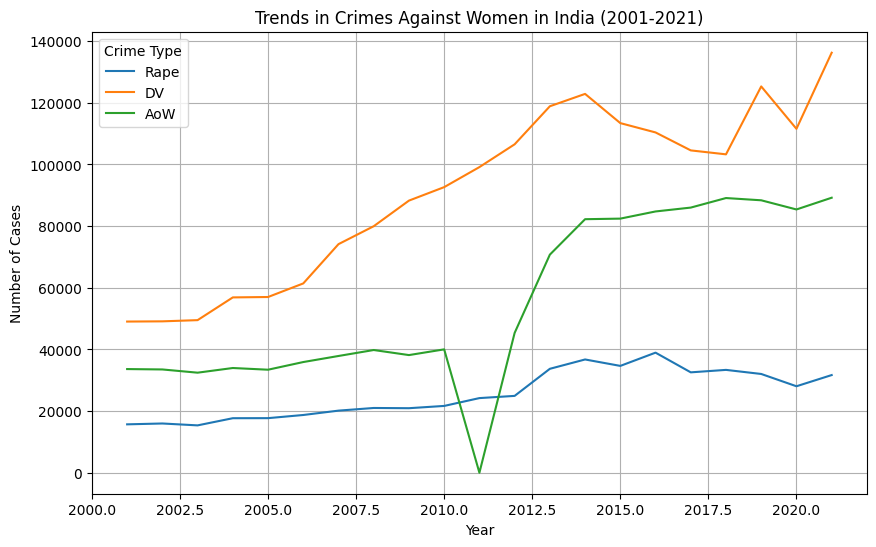

In [21]:
plt.figure(figsize=(10, 6))
for crime_type in ['Rape', 'DV', 'AoW']:  # Add more as needed
    plt.plot(crimeYear.index, crimeYear[crime_type], label=crime_type)
plt.title('Trends in Crimes Against Women in India (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

## 4.9 Heatmap of Rape Cases in India by State (2001-2021)

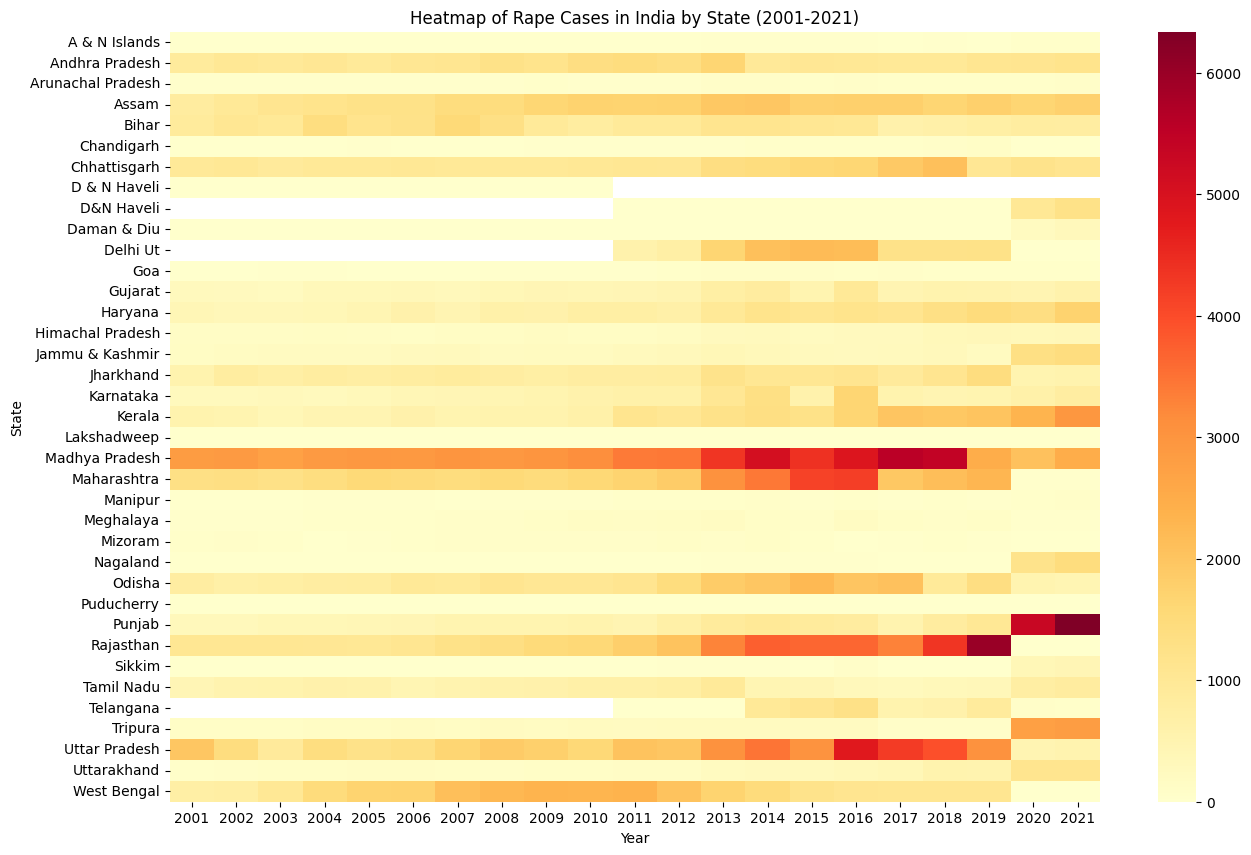

<Figure size 640x480 with 0 Axes>

In [23]:
heatmap_data = data.pivot(index="State", columns="Year", values="Rape")

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Heatmap of Rape Cases in India by State (2001-2021)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()
plt.savefig('heatmap.png', bbox_inches='tight')

## 4.10 Pair Plot of Different Crimes against Women in India

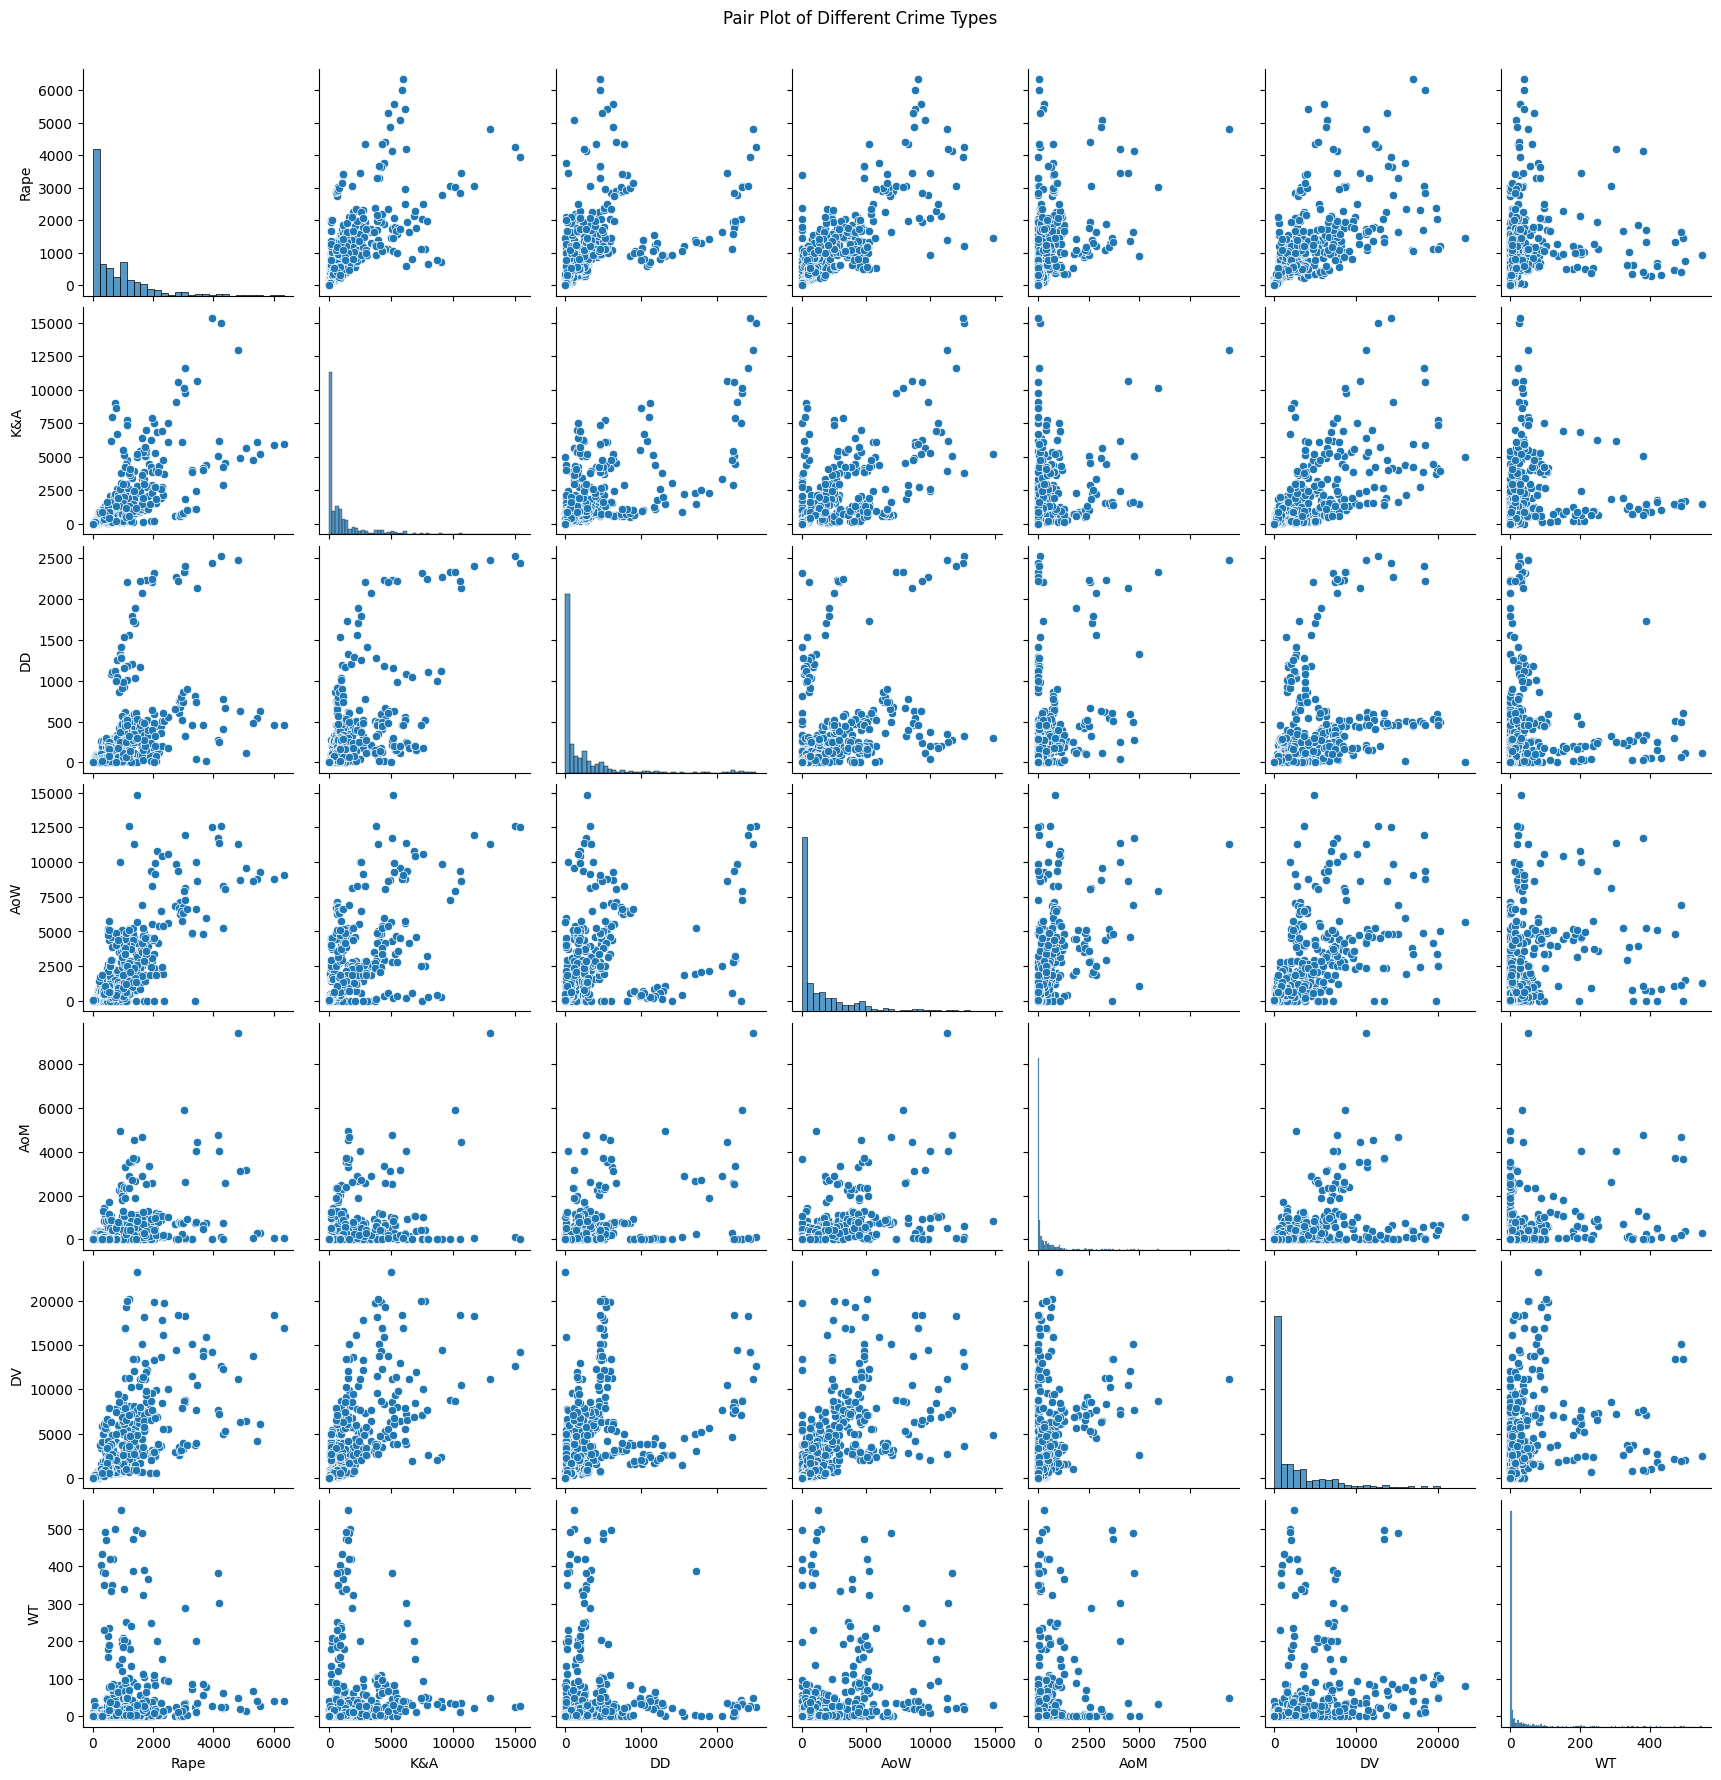

In [24]:
sns.pairplot(data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']])
plt.suptitle('Pair Plot of Different Crime Types', y=1.02)
plt.show()

## 4.11 Crime Composition - Pie Chart

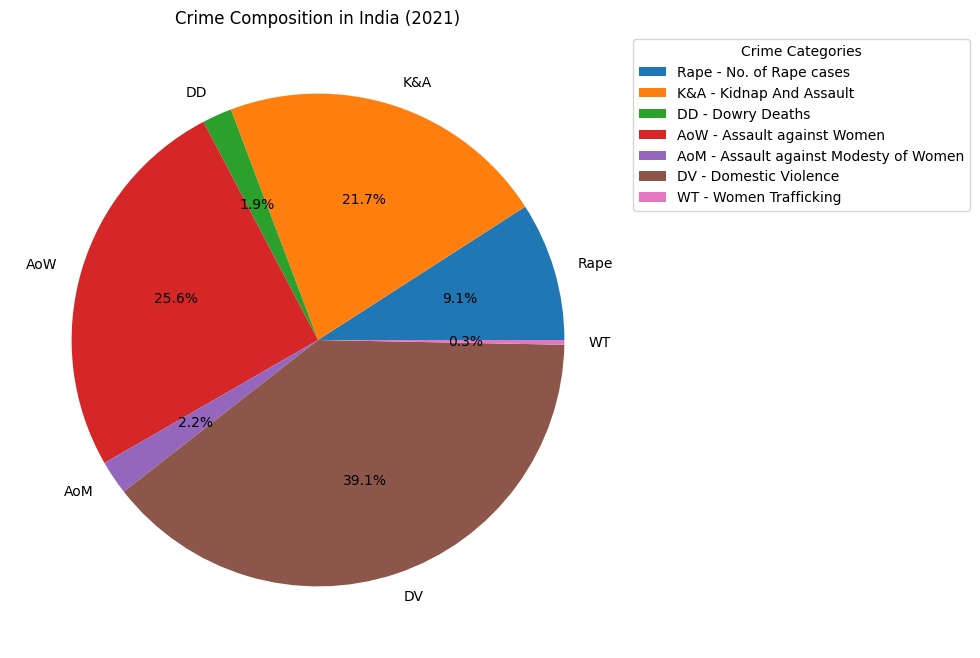

<Figure size 640x480 with 0 Axes>

In [26]:
crime_2021 = data[data['Year'] == 2021].sum()

fig, ax = plt.subplots(figsize=(8, 8))
crime_2021[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].plot(kind='pie', autopct='%1.1f%%', ax=ax)
plt.title('Crime Composition in India (2021)')
plt.ylabel('')

# Custom legend
labels = [
    "Rape - No. of Rape cases",
    "K&A - Kidnap And Assault",
    "DD - Dowry Deaths",
    "AoW - Assault against Women",
    "AoM - Assault against Modesty of Women",
    "DV - Domestic Violence",
    "WT - Women Trafficking"
]
ax.legend(labels, loc='upper left', bbox_to_anchor=(1, 1), title="Crime Categories")

plt.show()
plt.savefig('piechart.png', bbox_inches='tight')

We can see that roughly 40% (39.1%) of Indian Women have been a **victim of Domestic Violence**. That roughly translates to **27,12,00,000** individuals! 

## 4.12 Bubble Plot of Rape vs Domestic Violence

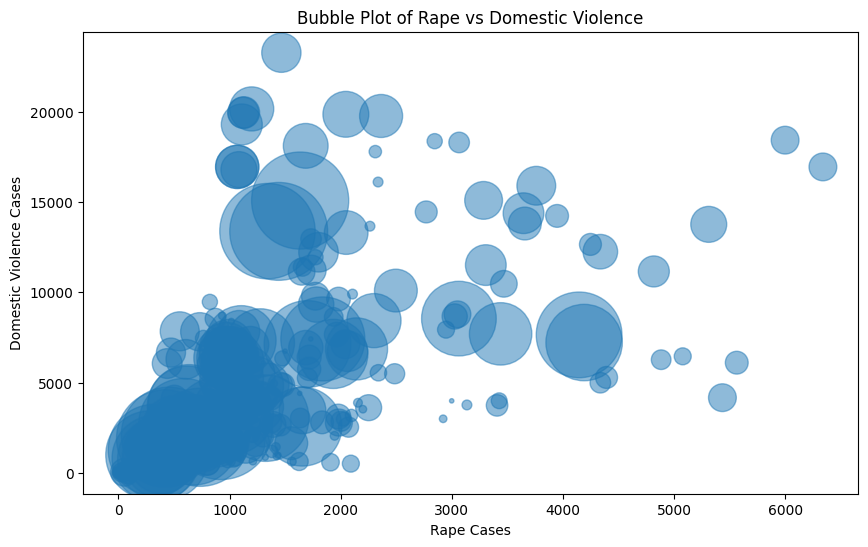

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rape'], data['DV'], s=data['WT']*10, alpha=0.5)
plt.title('Bubble Plot of Rape vs Domestic Violence')
plt.xlabel('Rape Cases')
plt.ylabel('Domestic Violence Cases')
plt.show()
plt.savefig('bubbleplot.png', bbox_inches="tight")

The bubble plot further solidifies the fact that **a single victim is often subject to multiple crimes, in many unfortunate cases, multiple times**...

## 4.13 Radar Chart by State

<Figure size 640x480 with 0 Axes>

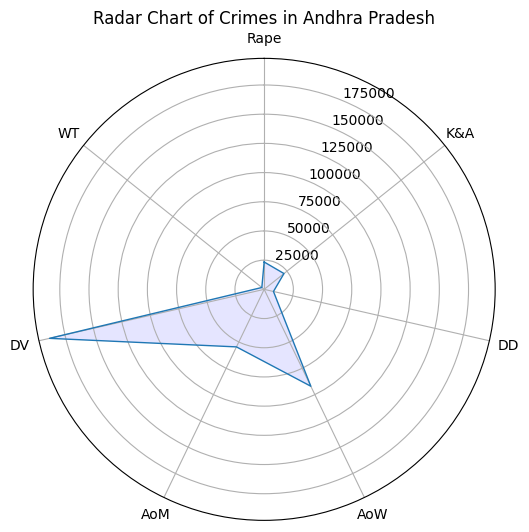

<Figure size 640x480 with 0 Axes>

<function __main__.draw_radar_chart(state)>

In [40]:
def draw_radar_chart(state):
    plt.clf()

    labels = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    stats = data[data['State'] == state].sum()[labels].values

    num_vars = len(labels)

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], labels)

    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, linewidth=1, linestyle='solid')

    ax.fill(angles, stats, 'b', alpha=0.1)

    plt.title(f'Radar Chart of Crimes in {state}')
    plt.show()
    plt.savefig('radar.png')

state_dropdown = widgets.Dropdown(
    options=data['State'].unique(),
    description='State:',
)

widgets.interact(draw_radar_chart, state=state_dropdown)

## 4.14 Reported V/s Unreported Cases

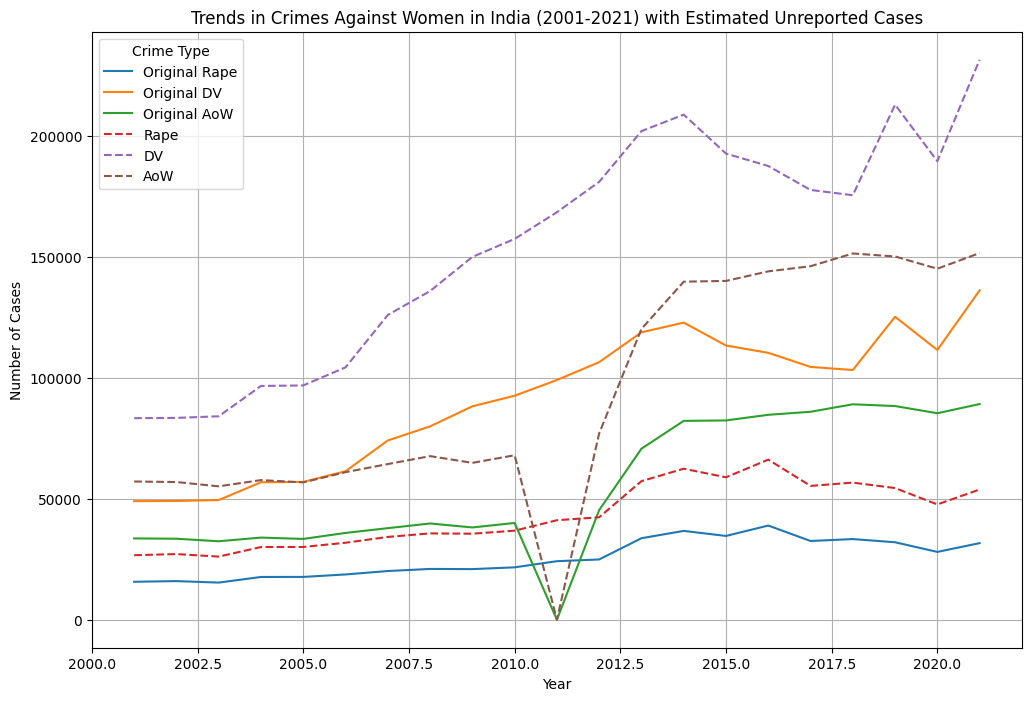

In [39]:
plt.figure(figsize=(12, 8))

for crime_type in ['Rape', 'DV', 'AoW']:
    plt.plot(crimeYear.index, crimeYear[crime_type], label=f'Original {crime_type}')

for crime_type in ['Rape', 'DV', 'AoW']:
    unreported_crimes = crimeYear[crime_type] * 1.70
    plt.plot(crimeYear.index, unreported_crimes, linestyle='--', label=f'{crime_type}')

plt.title('Trends in Crimes Against Women in India (2001-2021) with Estimated Unreported Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

According to statistics, about **70-80% of instances of crimes against Women goes unreported**.

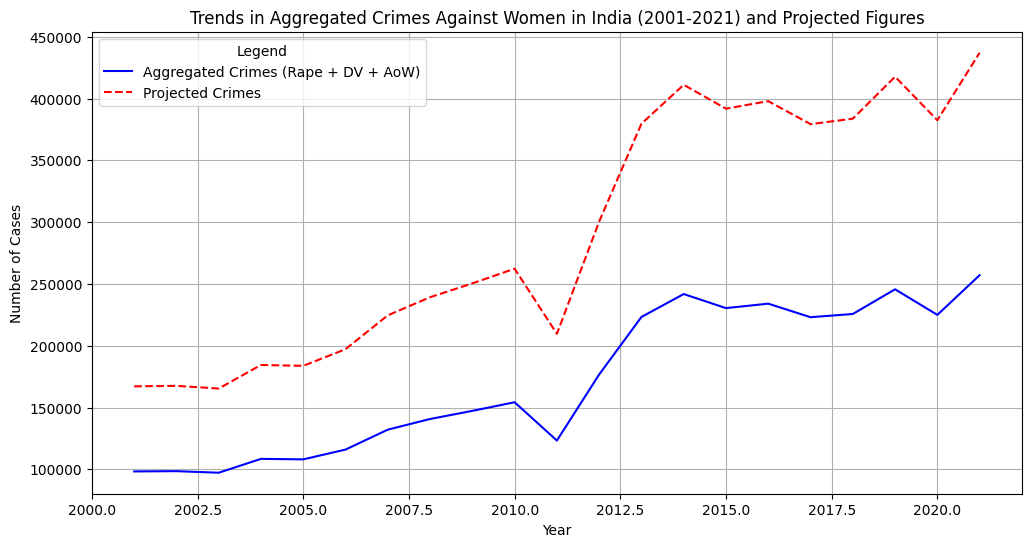

<Figure size 640x480 with 0 Axes>

In [42]:
data['Total_Crimes'] = data[['Rape', 'DV', 'AoW']].sum(axis=1)

data['Projected_Crimes'] = data['Total_Crimes'] * 1.70

crimeYear = data.groupby('Year').sum()

plt.figure(figsize=(12, 6))
plt.plot(crimeYear.index, crimeYear['Total_Crimes'], label='Aggregated Crimes (Rape + DV + AoW)', color='blue')
plt.plot(crimeYear.index, crimeYear['Projected_Crimes'], label='Projected Crimes', color='red', linestyle='--')

plt.title('Trends in Aggregated Crimes Against Women in India (2001-2021) and Projected Figures')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Legend')
plt.grid(True)
plt.show()
plt.savefig('Projected.png', bbox_inches='tight')

# 5. India on Global Index(s)

In [43]:
data = {
    'Index': [
        'Global Gender Gap Index 2023',
        'Thomson Reuters Poll 2018',
        'Global Peace Index 2023',
        'Gender Inequality Index 2021',
        'Women, Peace, and Security Index 2021'
    ],
    'Rank': [127, 1, 126, 122, 148],
    'Total Countries': [146, 193, 163, 162, 170],
    'Description': [
        'Measures gender gaps in economic, educational, health, and political outcomes.',
        'Ranked as the most dangerous country for women in 2018 based on expert perceptions.',
        'Measures peace based on crime rates, civil unrest, and conflicts.',
        'Reflects gender inequalities in health, empowerment, and economic activity.',
        'Measures women\'s inclusion, justice, and security.'
    ]
}

df = pd.DataFrame(data)

# Scatter plot
fig = px.scatter(df, y='Index', x='Rank', 
                 size='Total Countries', color='Rank',
                 title='India\'s Ranking on Various Global Indexes',
                 labels={'Rank': 'Rank', 'Index': 'Global Index'},
                 hover_data={'Index': True, 'Rank': True, 'Total Countries': True, 'Description': True},  # Show description on hover
                 size_max=15)

fig.update_traces(marker=dict(symbol='circle'))
fig.update_layout(yaxis_title='', xaxis_title='Rank',
                  template='plotly_white',
                  xaxis=dict(autorange='reversed'))

fig.show()

According to the Thomson Reuters Poll - 2018, **India is the Most Dangerous Country for Women**, **127th position among 147 Countries in Global Gender Gap Index 2023** shows disturbing gaps between Men and Women in country with respect to economic, educational and political outcomes.

source: wikipedia

In [44]:
# Data
data = {
    'Date': [
        '2002-02-28', '2005-03-01', '2006-07-20', '2012-12-16', 
        '2013-09-19', '2014-05-27', '2016-04-09', '2018-11-21', 
        '2019-09-14', '2020-09-14', '2021-10-02', '2022-01-17', 
        '2023-05-28', '2024-06-10'
    ],
    'Case': [
        'Gujarat Riots', 'Mathura Rape Case', 'Satyam Babu Case', 
        'Nirbhaya Case', 'Kolkata Rape Case', 'Badaun Gang Rape Case', 
        'Asifa Bano Case', 'Unnao Rape Case', 'Telangana Rape/Murder Case', 
        'Hathras Case', 'Delhi Rape Case', 
        'Navi Mumbai Rape Case', 'Gurugram Rape Case', 'Kolkata Rape Case'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

df['Level'] = [np.random.randint(-6,-2) if (i%2)==0 else np.random.randint(2,6) for i in range(len(df["Case"]))]
df["Date"] = pd.to_datetime(df["Date"])

print(df)

         Date                        Case  Level
0  2002-02-28               Gujarat Riots     -4
1  2005-03-01           Mathura Rape Case      2
2  2006-07-20            Satyam Babu Case     -6
3  2012-12-16               Nirbhaya Case      4
4  2013-09-19           Kolkata Rape Case     -3
5  2014-05-27       Badaun Gang Rape Case      2
6  2016-04-09             Asifa Bano Case     -3
7  2018-11-21             Unnao Rape Case      2
8  2019-09-14  Telangana Rape/Murder Case     -6
9  2020-09-14                Hathras Case      5
10 2021-10-02             Delhi Rape Case     -6
11 2022-01-17       Navi Mumbai Rape Case      4
12 2023-05-28          Gurugram Rape Case     -3
13 2024-06-10           Kolkata Rape Case      5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14 non-null     datetime64[ns]
 1   Case    14 non-null     object        
 2   Level   14 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 464.0+ bytes


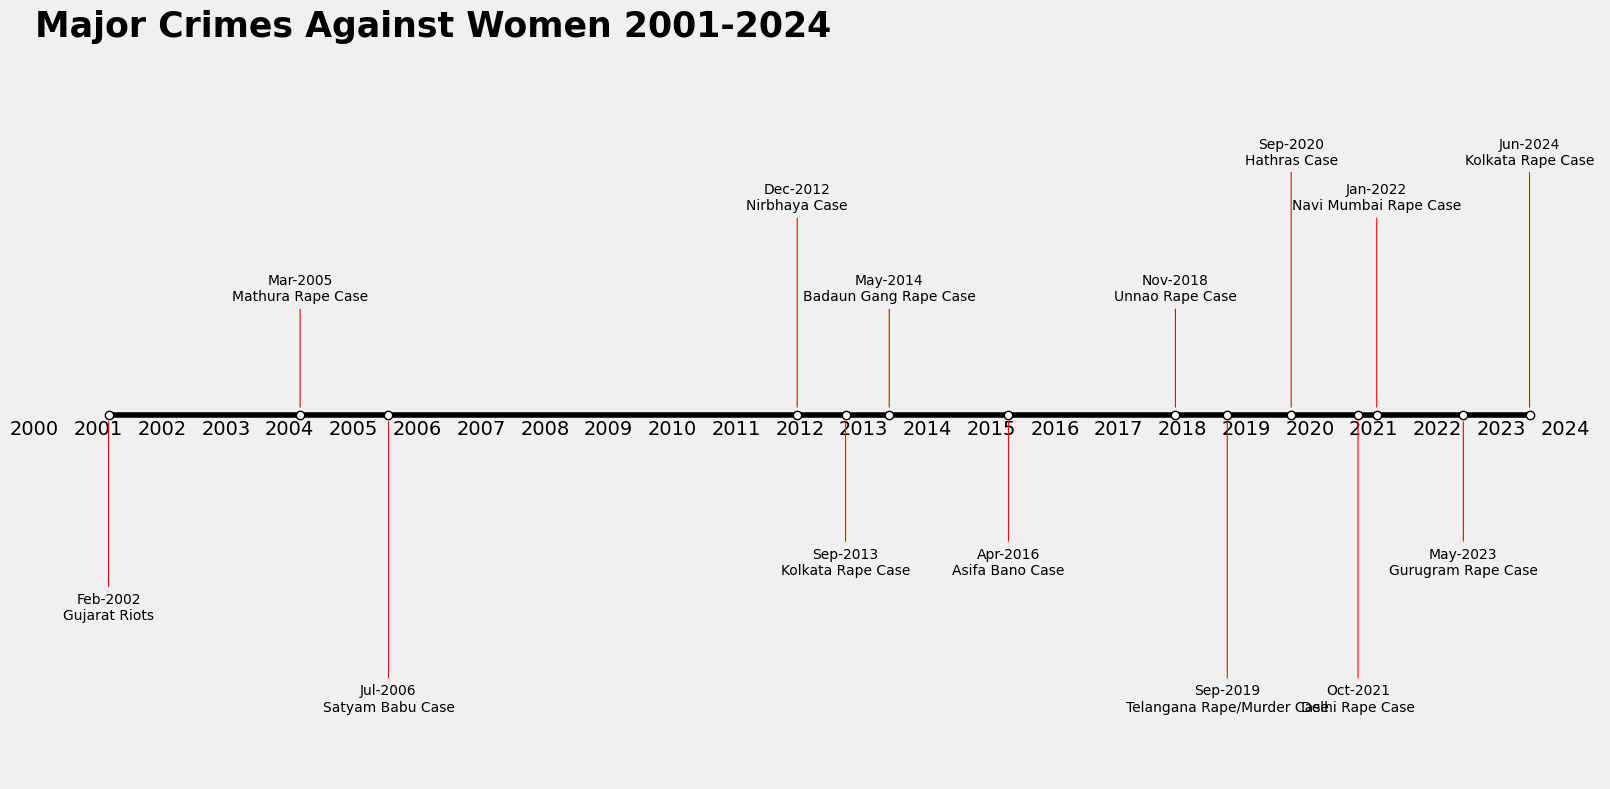

In [47]:
with plt.style.context("fivethirtyeight"):

    fig, ax = plt.subplots(figsize=(18,9))

    ax.plot(df.Date, [0,] * len(df), "-o", color="black", markerfacecolor="white");
    # Set x-ticks with correct labels
    years = pd.date_range("2000-01-01", "2024-12-31", freq="Y")
    ax.set_xticks(years)
    ax.set_xticklabels([year.strftime('%Y') for year in years])

    ax.set_ylim(-8, 8)

    for idx in range(len(df)):
        dt, case, level = df["Date"][idx], df["Case"][idx], df["Level"][idx]
        dt_str = dt.strftime("%b-%Y")

        offset = 0.5 if level > 0 else -0.5  # Slight offset to avoid overlap
        ax.annotate(dt_str + "\n" + case, xy=(dt, 0.1 if level>0 else -0.1), xytext=(dt,level+offset),
                   arrowprops=dict(arrowstyle="-", color="red", linewidth=0.8),
                   ha="center", fontsize=10)

    ax.spines[["left", "top", "right","bottom"]].set_visible(False);
    ax.spines[["bottom"]].set_position(("axes", 0.5))
    ax.yaxis.set_visible(False)
    ax.set_title("Major Crimes Against Women 2001-2024", pad=10, loc="left", fontsize=25, fontweight="bold")
    ax.grid(False)
    plt.savefig("timeline.png", bbox_inches='tight')
    plt.show()

# 6. Government Policies and Actions
- **The Criminal Law (Amendment) Act, 2013**:
  - **Context**: Passed in the aftermath of the 2012 Nirbhaya gang rape case in Delhi, this act brought about significant changes in the laws concerning sexual offenses against women.
  - **Key Provisions**: 
    - Introduced stricter punishment for rape, including the death penalty in certain cases.
    - Expanded the definition of rape to include other forms of sexual assault.
    - Made provisions for fast-track courts to expedite cases involving sexual offenses.

- **Beti Bachao, Beti Padhao (2015)**:
  - **Context**: This is a national campaign aimed at promoting the survival, protection, and education of the girl child.
  - **Key Provisions**: 
    - Focuses on creating awareness about issues such as female infanticide, gender discrimination, and violence against women.
    - Primarily focused on education and survival, indirectly addressing the larger issue of crimes against women by promoting gender equality.

- **One Stop Centre Scheme (2015)**:
  - **Context**: Part of the Nirbhaya Fund, this scheme was launched to provide support and assistance to women affected by violence, including sexual assault, domestic violence, and human trafficking.
  - **Key Provisions**: 
    - Centers provide legal, medical, and psychological support to victims of violence.
    - Intended to be a single point of contact for women seeking help.

- **Women Helpline Scheme (2015)**:
  - **Context**: Another initiative under the Nirbhaya Fund, this scheme provides a 24-hour emergency response system for women in distress.
  - **Key Provisions**: 
    - Helpline is integrated with police, ambulance, and other emergency services to provide immediate assistance to women facing violence.

- **POSCO Act, 2012 (Protection of Children from Sexual Offences Act)**:
  - **Context**: While primarily focused on children, this act has had significant implications for young girls who are victims of sexual violence.
  - **Key Provisions**: 
    - Provides stringent punishment for sexual offenses against children, including life imprisonment and the death penalty in certain cases.

# 7. Future Scope

I've tried my best to Visually represent and Analyse the issue, but due to my reasons I'll not be able to continue it any further. I'm Listing down some key points through which this Analysis can be further done at greater depth.

1. **Plot a Choropleth** - I've tried plotting a Choropleth for better Geospatial Analysis. This can further help us understand Regional Trends and Disparities. I wasn't successfull in doing so because I couldn't find the coordinates and have little idea about Google Maps API Integration.

2. **Sentiment Analysis** - Sentiment Analysis can also be done by scrapping relevant data from the web (News Articles, Social Media, Wikipedia etc). It will help us understand public sentiments before and after major incidents or policies, which in turn will improve societal response.

3. **Correlation with Socio-Economic Indicators** - Other Datasets can also be incorporated to study impact of education, gender-ratio, poverty levels and unemployment rates. This may give us insights about root causes of such crimes

4. **AI/ML Models and ALgorithm** - I've tried incorporating various linear algorithms like Linear regression and RandomForest and Time Series models like ARIMA  for prediction of cases but their accuracy is fairly low. I believe maybe some ANN could be train after sufficiently augmenting the existing dataset for better time series forecasting.

# 8. Concluding Remarks

This analysis has been a deeply personal journey for me. The Kolkata rape case profoundly moved me, stirring a mix of anger, sadness, and a resolute desire to contribute to change in any way I could. It is this case that inspired me to delve into the data and try to make sense of the broader picture regarding crimes against women in India. Through this analysis, I hoped to highlight the urgency of the situation and the need for continued efforts in combating this pervasive issue.

As I reflect on the findings, I am reminded of the Sanskrit saying, **_सर्वे भवन्तु सुखिनः, सर्वे सन्तु निरामयाः_** which means, "_May all be happy; may all be free from illness._" This ancient wisdom underscores the ideal society we should all strive for—a society where every individual, especially women, can live without fear of violence.

I am open to any suggestions that can further enhance this study, and I apologize for any errors or oversights that may have occurred. I want to emphasize that this analysis is not intended to hurt anyone's sentiments but rather to serve as a critical reflection on the progress we have made and the work that still lies ahead.

As a proud citizen of my country, I believe that acknowledging the problems we face is the first step toward finding solutions. This study is a keyframe to analyze and absorb that a lot has happened, but much more still needs to be done to ensure the safety and dignity of every woman in our society.

**_कर्मण्येवाधिकारस्ते मा फलेषु कदाचन_**—we have the right to perform our duty, but we must not be attached to the results. With this in mind, I will continue to contribute in any way I can, hoping that together, we can create a safer and more just society for all.
